##Winpython Default checker
(earlier versions before may miss some functionalities)

In [1]:
%matplotlib inline

Mandelbrot created by numba in 1.834233 s


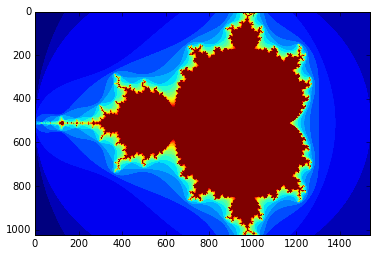

In [2]:
# checking Numba JIT toolchain + Mingwpy compiler toolchain
import numpy as np
image = np.zeros((1024, 1536), dtype = np.uint8)

from pylab import imshow, show
from timeit import default_timer as timer
from numba import autojit

@autojit
def mandel(x, y, max_iters):
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i
  return max_iters

def create_fractal(min_x, max_x, min_y, max_y, image, iters , mandelx):
  height = image.shape[0]
  width = image.shape[1]
  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandelx(real, imag, iters)
      image[y, x] = color
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20 , mandel) 
dt = timer() - start

print ("Mandelbrot created by numba in %f s" % dt)
imshow(image)
show()

In [3]:
# Cython toolchain test
%load_ext Cython

In [4]:
%%cython 
# checking a Cython compilation
def mandel_cython(x, y, max_iters):
  cdef int   i 
  cdef double   cx, cy , zx, zy
  cx , cy = x, y 
  zx , zy =0 ,0 
  for i in range(max_iters):
    zx , zy = zx*zx - zy*zy + cx , zx*zy*2 + cy
    if (zx*zx + zy*zy) >= 4:
      return i
  return max_iters

In [5]:
%%cython -a
# with %%cython -a , full C-speed lines are shown in white, slowest python-speed lines are shown in dark yellow lines 
# ==> put your cython rewrite effort on dark yellow lines
def mandel_cython(x, y, max_iters):
  cdef int   i 
  cdef double   cx, cy , zx, zy
  cx , cy = x, y 
  zx , zy =0 ,0 
  for i in range(max_iters):
    zx , zy = zx*zx - zy*zy + cx , zx*zy*2 + cy
    if (zx*zx + zy*zy) >= 4:
      return i
  return max_iters

Mandelbrot created by cython in 1.311927 s


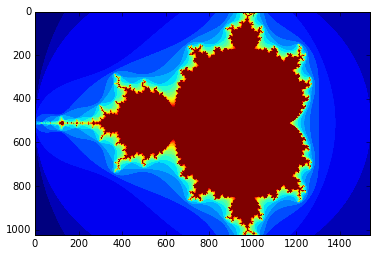

In [6]:
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20 , mandel_cython) 
dt = timer() - start

print ("Mandelbrot created by cython in %f s" % dt)
imshow(image)
show()

### Holoviews and Bokeh are in Winpython after July 2015 07th

:Layout
   .AdjointLayout.I :AdjointLayout
      :Histogram   [z]   (Frequency)
      :Overlay
         .Image.I :Image   [x,y]   (z)
         .HLine.I :HLine   [x,y]
   .Curve.I         :Curve   [x]   (z)
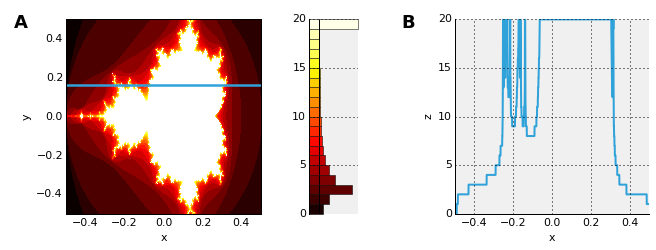

In [7]:
from holoviews import *
%load_ext holoviews.ipython
fractal = Image(image)

((fractal * HLine(y=0.16)).hist() + fractal.sample(y=0.16))

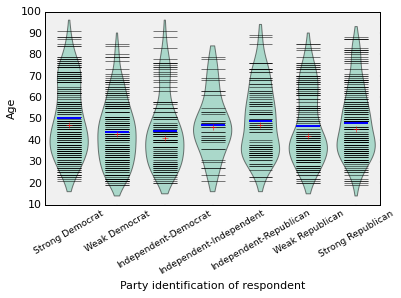

In [8]:
# checking statsmodels
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = ["Strong Democrat", "Weak Democrat", "Independent-Democrat",
          "Independent-Independent", "Independent-Republican",
          "Weak Republican", "Strong Republican"]
plt.rcParams['figure.subplot.bottom'] = 0.23  # keep labels visible
plt.rcParams['figure.figsize'] = (6.0, 4.0)  # make plot larger in notebook
age = [data.exog['age'][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_opts={'cutoff_val':5, 'cutoff_type':'abs',
                                'label_fontsize':'small',
                                'label_rotation':30}
sm.graphics.beanplot(age, ax=ax, labels=labels,
                     plot_opts=plot_opts)
ax.set_xlabel("Party identification of respondent")
ax.set_ylabel("Age")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


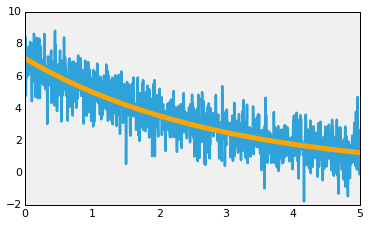

In [9]:
# lmfit test (from http://nbviewer.ipython.org/github/lmfit/lmfit-py/blob/master/examples/lmfit-model.ipynb)
import numpy as np
import matplotlib.pyplot as plt
def decay(t, N, tau):
    return N*np.exp(-t/tau)
t = np.linspace(0, 5, num=1000)
data = decay(t, 7, 3) + np.random.randn(*t.shape)

from lmfit import Model

model = Model(decay, independent_vars=['t'])
result = model.fit(data, t=t, N=10, tau=1)
plt.plot(t, data)  # data
plt.plot(t, decay(t=t, **result.values), color='orange', linewidth=5)  # best-fit model

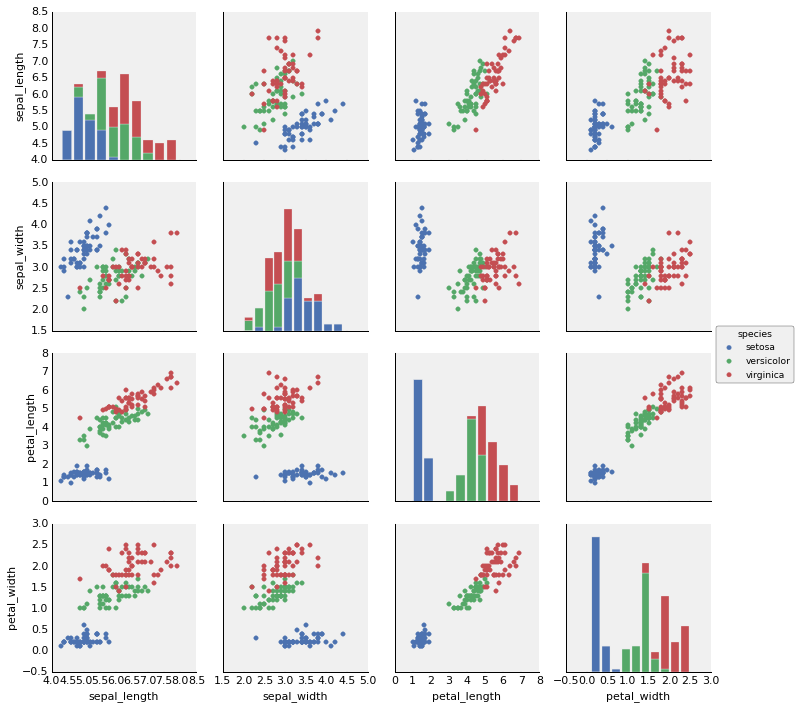

In [10]:
# checking seaborn (it changes matplotlib defaults, so testing last)
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", size=2.5)

In [11]:
# For PyQtgraph (testing Installed Qt library)
# double-clik in "Basic Plotting" example (the second choice going down from top options)
import pyqtgraph.examples ; pyqtgraph.examples.run()

In [ ]:
import pandas as pd
from bokeh import mpl
from bokeh.plotting import output_notebook, show
import matplotlib as mplc
# Generate the pandas dataframe
data = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=100)
data = pd.DataFrame(data, columns=["X", "Y"])
mplc.rc("figure", figsize=(6, 6))

# Just plot seaborn kde
sns.kdeplot(data, cmap="BuGn_d")

plt.title("Seaborn kdeplot in bokeh.")

output_notebook()

show(mpl.to_bokeh())

In [13]:
# checking sympy 
import sympy
a=sympy.Symbol('a')
b=sympy.Symbol('b')
e=(a+b)**5
print (e.expand())

a**5 + 5*a**4*b + 10*a**3*b**2 + 10*a**2*b**3 + 5*a*b**4 + b**5


In [14]:
# checking Scipy and Scikit-learn
import numpy as np
X = np.random.random((1000, 3))

from scipy.spatial.distance import cdist
%timeit cdist(X, X)

from sklearn.metrics import euclidean_distances
%timeit euclidean_distances(X, X)

100 loops, best of 3: 17.3 ms per loop
10 loops, best of 3: 26.2 ms per loop


In [15]:
# checking Ipython Notebook interactivity.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interactive
from IPython.display import Audio, display
def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    print(f1, f2, abs(f1-f2))
    display(Audio(data=signal, rate=rate))
    return signal
v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)

220.0 224.0 4.0


## SQL tools

In [16]:
# checking Ipython-sql, sqlparse, SQLalchemy
%load_ext sql

In [17]:
%%sql sqlite:///.baresql.db
DROP TABLE IF EXISTS writer;
CREATE TABLE writer (first_name, last_name, year_of_death);
INSERT INTO writer VALUES ('William', 'Shakespeare', 1616);
INSERT INTO writer VALUES ('Bertold', 'Brecht', 1956);
SELECT  * , sqlite_version() as sqlite_version from Writer order by Year_of_death

Done.
Done.
1 rows affected.
1 rows affected.
Done.


first_name,last_name,year_of_death,sqlite_version
William,Shakespeare,1616,3.8.3.1
Bertold,Brecht,1956,3.8.3.1


In [18]:
# checking sqlite_bro: this should lanch a separate non-browser window with sqlite_bro's welcome
!cmd start cmd /C sqlite_bro

In [19]:
# checking baresql
from __future__ import print_function, unicode_literals, division  # line needed only if Python2.7
from baresql import baresql
bsql = baresql.baresql(connection="sqlite:///.baresql.db")
bsqldf = lambda q: bsql.df(q, dict(globals(),**locals()))

users = ['Alexander', 'Billy', 'Charles', 'Danielle', 'Esmeralda', 'Franz', 'Greg']
#  We use the python 'users' list like a SQL table
sql = "select 'Welcome ' ||  c0 || ' !' as say_hello, length(c0) as name_length from users$$ where c0 like '%a%' "
bsqldf(sql)

,say_hello,name_length
0,Welcome Alexander !,9
1,Welcome Charles !,7
2,Welcome Danielle !,8
3,Welcome Esmeralda !,9
4,Welcome Franz !,5


In [20]:
# checking db.py
from db import DB
db=DB(dbtype="sqlite", filename=".baresql.db")
db.query("select  sqlite_version() as sqlite_version  ;") 

Indexing schema. This will take a second...finished!


,sqlite_version
0,3.8.3.1


In [21]:
db.tables

Refreshing schema. Please wait...done!


Table,Columns
users$$,"index, c0"
writer,"first_name, last_name, year_of_death"


In [22]:
# checking Web Scraping: beautifulsoup and requests 
import requests
from bs4 import BeautifulSoup

URL = 'http://en.wikipedia.org/wiki/Franklin,_Tennessee'

req = requests.get(URL, headers={'User-Agent' : "Mining the Social Web"})
soup = BeautifulSoup(req.text, "lxml")

geoTag = soup.find(True, 'geo')

if geoTag and len(geoTag) > 1:
    lat = geoTag.find(True, 'latitude').string
    lon = geoTag.find(True, 'longitude').string
    print ('Location is at', lat, lon)
elif geoTag and len(geoTag) == 1:
    (lat, lon) = geoTag.string.split(';')
    (lat, lon) = (lat.strip(), lon.strip())
    print ('Location is at', lat, lon)
else:
    print ('No location found')

Location is at 35.92917 -86.85750


In [23]:
# checking nbconvert 
!ipython nbconvert "Beginner's FAQ.ipynb" --to html

[NbConvertApp] Converting notebook Beginner's FAQ.ipynb to html
[NbConvertApp] Writing 200065 bytes to Beginner's FAQ.html


In [24]:
%%HTML
<iframe src="Beginner's FAQ.html" width=700 height350></iframe>

## Operations Research

In [25]:
# Pulp example : minimizing the weight to carry 99 pennies
#                (from Philip I Thomas)
# see https://www.youtube.com/watch?v=UmMn-N5w-lI#t=995
# Import PuLP modeler functions
from pulp import *
# The prob variable is created to contain the problem data        
prob = LpProblem("99 pennies Problem",LpMinimize)

# Variables represent how many of each coin we want to carry
pennies = LpVariable("Number of pennies",0,None,LpInteger)
nickels = LpVariable("Number of nickels",0,None,LpInteger)
dimes = LpVariable("Number of dimes",0,None,LpInteger)
quarters = LpVariable("Number of quarters",0,None,LpInteger)

# The objective function is added to 'prob' first

# we want to minimize (LpMinimize) this 
prob += 2.5 * pennies + 5 * nickels + 2.268 * dimes + 5.670 * quarters, "Total coins Weight"

# We want exactly 99 cents
prob += 1 * pennies + 5 * nickels + 10 * dimes + 25 * quarters == 99, ""

# The problem data is written to an .lp file
prob.writeLP("99cents.lp")
prob.solve()

# print ("status",LpStatus[prob.status] )
print ("Minimal Weight to carry exactly 99 pennies is %s grams" % value(prob.objective))
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print (v.name, "=", v.varValue)

Minimal Weight to carry exactly 99 pennies is 31.546 grams
Number_of_dimes = 7.0
Number_of_nickels = 0.0
Number_of_pennies = 4.0
Number_of_quarters = 1.0


## Deep Learning

In [26]:
# Checking Theano
import theano.tensor as T
from theano import function
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y
f = function([x, y], z)
f([[1, 2], [3, 4]], [[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

## Wrap-up

In [27]:
# optional scipy full test (takes up to 10 minutes)
#!cmd /C start cmd /k python.exe  -c "import scipy;scipy.test()"

In [28]:
import IPython;IPython.__version__

'3.2.1'